# Практика. Метрики классификации

Данное практическое задание позволит вам научиться вычислять метрики бинарной классификации и сравнивать по ним различные модели.

## Прогноз оттока клиентов телеком (telecom churn prediction)

В данной задаче необходимо потсроить модель, которая сможет выделить среди клиентов телекома тех, кто собирается прекратить пользоваться услугами.

### Подключение библиотек

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [2]:
dataset_url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv'

churn_ds = pd.read_csv(dataset_url)
churn_ds.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churn_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### Подготовка данных

Целевая переменная хранится в столбце Churn.

В качестве признаков возьмем только числовые признаки и бинарные категориальные (International plan и Voice mail plan).

Проверим, что столбцы 'International plan' и 'Voice mail plan' модержат только 2 значения.

In [4]:
churn_ds['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
churn_ds['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

Закодируем эти значения с помощью 0 и 1.

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

churn_ds[[
    'International plan encoded',
    'Voice mail plan encoded',
]] = ordinal_encoder.fit_transform(churn_ds[['International plan', 'Voice mail plan']])

In [7]:
target = 'Churn'
features = [
    'Account length',
    'International plan encoded',
    'Voice mail plan encoded',
    'Number vmail messages',
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge',
    'Customer service calls',
]

y = churn_ds[target]
X = churn_ds[features]

### Разделение на обучающую и проверочную выборки

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Задание

1. Обучите DummyClassifier в качестве базовой модели и оцените метрику accuracy на проверочной выборке.
2. Обучите LogisticRegression и KNeighborsClassifier и сравните их accuracy с базовой моделью.
3. Для всех 3-х моделей вычислите точность, полноту и F-меру.
4. Проведите сравнительный анализ по полученным метрикам
5. Постройте для LogisticRegression и KNeighborsClassifier PR-кривой и проведите ее анализ
6. Постройте для LogisticRegression и KNeighborsClassifier ROC-кривую и проведите ее анализ
7. На основании проведенного анализа выберите модель и метрику.

### Подключиение библиотеки

In [2]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import math

Populating the interactive namespace from numpy and matplotlib


### Загрузка исходника

In [3]:
dataset_url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv'

churn_ds = pd.read_csv(dataset_url)
churn_ds.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

churn_ds[[
    'International plan encoded',
    'Voice mail plan encoded',
]] = ordinal_encoder.fit_transform(churn_ds[['International plan', 'Voice mail plan']])

In [5]:
target = 'Churn'
features = [
    'Account length',
    'International plan encoded',
    'Voice mail plan encoded',
    'Number vmail messages',
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge',
    'Customer service calls',
]

y = churn_ds[target]
X = churn_ds[features]

## Деление выборки

In [6]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
len(X_ts)

1000

In [8]:
churn_ds.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan encoded,Voice mail plan encoded
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,0.0,1.0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,0.0,1.0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,0.0,0.0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,1.0,0.0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,1.0,0.0


# _Метод Соседей (kNN)_

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
error = []
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    pred_i = knn.predict(X_ts)
    error.append(np.mean(pred_i != y_ts))

Text(0, 0.5, 'Сред ошибка')

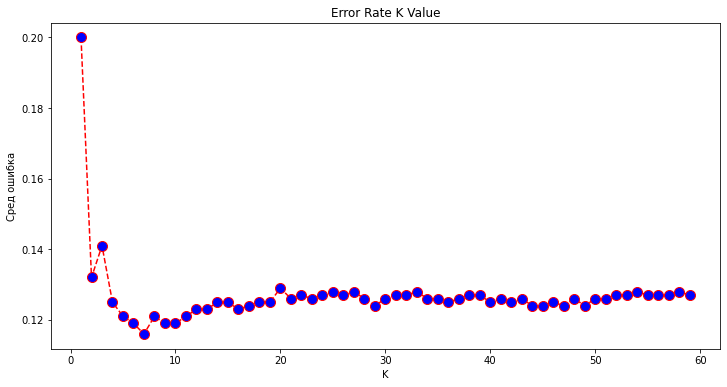

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K')
plt.ylabel('Сред ошибка')

In [12]:
kNN = KNeighborsClassifier(n_neighbors=7) 
kNN.fit(X_tr, y_tr)
y_pred=kNN.predict(X_ts)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_ts, y_pred))
print(classification_report(y_ts, y_pred))

[[846  11]
 [105  38]]
              precision    recall  f1-score   support

       False       0.89      0.99      0.94       857
        True       0.78      0.27      0.40       143

    accuracy                           0.88      1000
   macro avg       0.83      0.63      0.67      1000
weighted avg       0.87      0.88      0.86      1000



In [13]:
kNN7_acc=0.88

In [14]:
kNN = KNeighborsClassifier(n_neighbors=3) 
kNN.fit(X_tr, y_tr)
y_pred=kNN.predict(X_ts)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_ts, y_pred))
print(classification_report(y_ts, y_pred))

[[819  38]
 [103  40]]
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       857
        True       0.51      0.28      0.36       143

    accuracy                           0.86      1000
   macro avg       0.70      0.62      0.64      1000
weighted avg       0.83      0.86      0.84      1000



In [15]:
kNN3_acc=0.86

### _PR кривая_

- Кривые Precision-Recall суммируют компромисс между истинной положительной скоростью и положительным прогностическим значением для прогнозирующей модели, использующей различные пороги вероятности.

In [16]:
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    pred_i = knn.predict(X_ts)
    print(i)
    print(classification_report(y_ts, pred_i))

1
              precision    recall  f1-score   support

       False       0.89      0.87      0.88       857
        True       0.33      0.37      0.35       143

    accuracy                           0.80      1000
   macro avg       0.61      0.62      0.61      1000
weighted avg       0.81      0.80      0.81      1000

2
              precision    recall  f1-score   support

       False       0.88      0.98      0.93       857
        True       0.63      0.18      0.28       143

    accuracy                           0.87      1000
   macro avg       0.76      0.58      0.60      1000
weighted avg       0.84      0.87      0.84      1000

3
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       857
        True       0.51      0.28      0.36       143

    accuracy                           0.86      1000
   macro avg       0.70      0.62      0.64      1000
weighted avg       0.83      0.86      0.84      1000

4
           

In [34]:
Prec_F=[0.89,0.88,0.89,0.88,0.89,0.88,0.89,0.88,0.88]
Prec_T=[0.33,0.63,0.51,0.71,0.67,0.82,0.78,0.82,0.80]
Rec_F=[0.87,0.98,0.96,0.99,0.98,0.99,0.99,0.99,0.99]
Rec_T=[0.37,0.18,0.28,0.21,0.30,0.22,0.27,0.20,0.22]

Text(0, 0.5, 'precision')

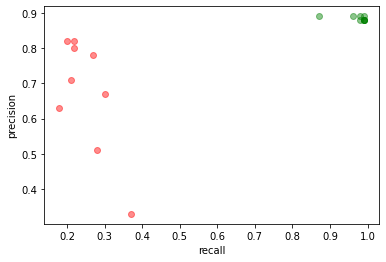

In [50]:
plt.scatter(Rec_F,Prec_F,alpha=0.45,color='green')
plt.scatter(Rec_T,Prec_T,alpha=0.45,color='red')
plt.xlabel("recall")
plt.ylabel("precision")
#plt.ylim(0.2,1.04)
#plt.xlim(0.1,1.04)

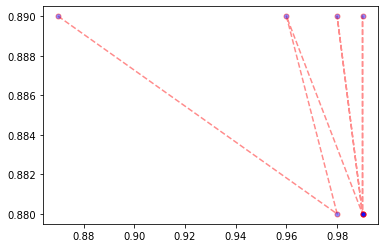

In [51]:
plt.plot(Rec_F,Prec_F,alpha=0.45, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

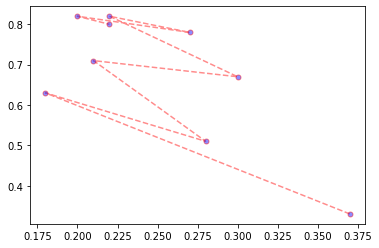

In [52]:
plt.plot(Rec_T,Prec_T,alpha=0.45, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

## Классификатор "болванчик"

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier().fit(X_tr, y_tr)
dummy_y_pred = dummy.predict(X_ts)
dummy_acc = accuracy_score(y_ts, dummy_y_pred)
print(f"Доля верных ответов для dummy (accuracy): {dummy_acc:.4}")

Доля верных ответов для dummy (accuracy): 0.857


In [19]:
DC_acc=dummy_acc

In [20]:
print('Разница по Доли верных ответов')
print(f"Метод соседей и Dummy: 7: {kNN7_acc-DC_acc:.5},' 2:',{kNN3_acc-DC_acc:.5}")

Разница по Доли верных ответов
Метод соседей и Dummy: 7: 0.023,' 2:',0.003


## Логистическая регрессия

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
LogReg = LogisticRegression()

In [24]:
LogReg.fit(X_tr, y_tr)

C:\Users\Dima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
kl=LogReg.predict(X_ts)

In [26]:
logreg_precision = precision_score(y_ts, kl)
logreg_recall = recall_score(y_ts, kl)

In [27]:
print(f"Точность(Precision) LogisticRegression: {logreg_precision:.5}")
print(f"Полнота(Recall) LogisticRegression: {logreg_recall:.5}")

Точность(Precision) LogisticRegression: 0.38462
Полнота(Recall) LogisticRegression: 0.034965


In [28]:
kNN_kl=knn.predict(X_ts)
knn_precision = precision_score(y_ts, kNN_kl)
knn_recall = recall_score(y_ts, kNN_kl)

In [29]:
print(f"Точность(Precision) kNN: {knn_precision:.5}")
print(f"Полнота(Recall) kNN: {knn_recall:.5}")
print('Для k=3 Точность: Prec(0)=',0.89,' Prec(1)=',0.51)
print('Для k=3 Полнота: Rec(0)=',0.96,' Rec(1)=',0.28)
print('Для k=7 Точность: Prec(0)=',0.89,' Prec(1)=',0.78)
print('Для k=7 Полнота: Rec(0)=',0.99,' Rec(1)=',0.27)

Точность(Precision) kNN: 0.8
Полнота(Recall) kNN: 0.22378
Для k=3 Точность: Prec(0)= 0.89  Prec(1)= 0.51
Для k=3 Полнота: Rec(0)= 0.96  Rec(1)= 0.28
Для k=7 Точность: Prec(0)= 0.89  Prec(1)= 0.78
Для k=7 Полнота: Rec(0)= 0.99  Rec(1)= 0.27


## F мера

In [30]:
from sklearn.metrics import f1_score

In [31]:
Dumpy_f1=f1_score(y_ts,dummy_y_pred)
logit_f1=f1_score(y_ts,kl)

In [32]:
print("F- мера Соседей knn")
print('Для k=3 : f1(0)=',0.94,' f1(1)=',0.4)
print('Для k=7 : f1(0)=',0.92,' f1(1)=',0.36)
print("F мера")
print(f" Болванчик: {Dumpy_f1:.5}")
print(f" LogisticRegression: {logit_f1:.5}")

F- мера Соседей knn
Для k=3 : f1(0)= 0.94  f1(1)= 0.4
Для k=7 : f1(0)= 0.92  f1(1)= 0.36
F мера
 Болванчик: 0.0
 LogisticRegression: 0.064103


- _Общее наблюдение 1:_ по полноте выигрывает Логистическая регрессия

## ROC кривая

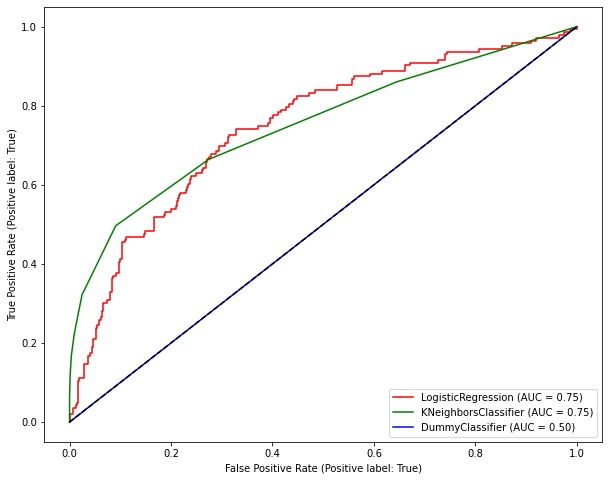

In [33]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10, 8))
roc_disp = plot_roc_curve(LogReg, X_ts, y_ts, ax=plt.axes(),color='red')
plot_roc_curve(knn, X_ts, y_ts, ax=roc_disp.ax_,color='green')
plot_roc_curve(dummy, X_ts, y_ts, ax=roc_disp.ax_,color='blue')
roc_disp.ax_.plot([0, 1], [0, 1], 'k--')